In [1]:
from diffusers import DiffusionPipeline
import torch

# Load Stable Diffusion XL Base1.0
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

c:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--stabilityai--stable-diffusion-xl-base-1.0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator.

In [2]:
# Optional CPU offloading to save some GPU Memory
pipe.enable_model_cpu_offload()

# Loading Trained LoRA Weights
pipe.load_lora_weights("AdamLucek/sdxl-base-1.0-oldbookillustrations-lora")

c:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--AdamLucek--sdxl-base-1.0-oldbookillustrations-lora. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [ ]:
prompt = "A lion "

# Invoke pipeline to generate image
image = pipe(
    prompt = prompt,
    num_inference_steps=50,
    height=1024,
    width=1024,
    guidance_scale=7.0,
).images[0]

100%|██████████| 50/50 [00:47<00:00,  1.05it/s]


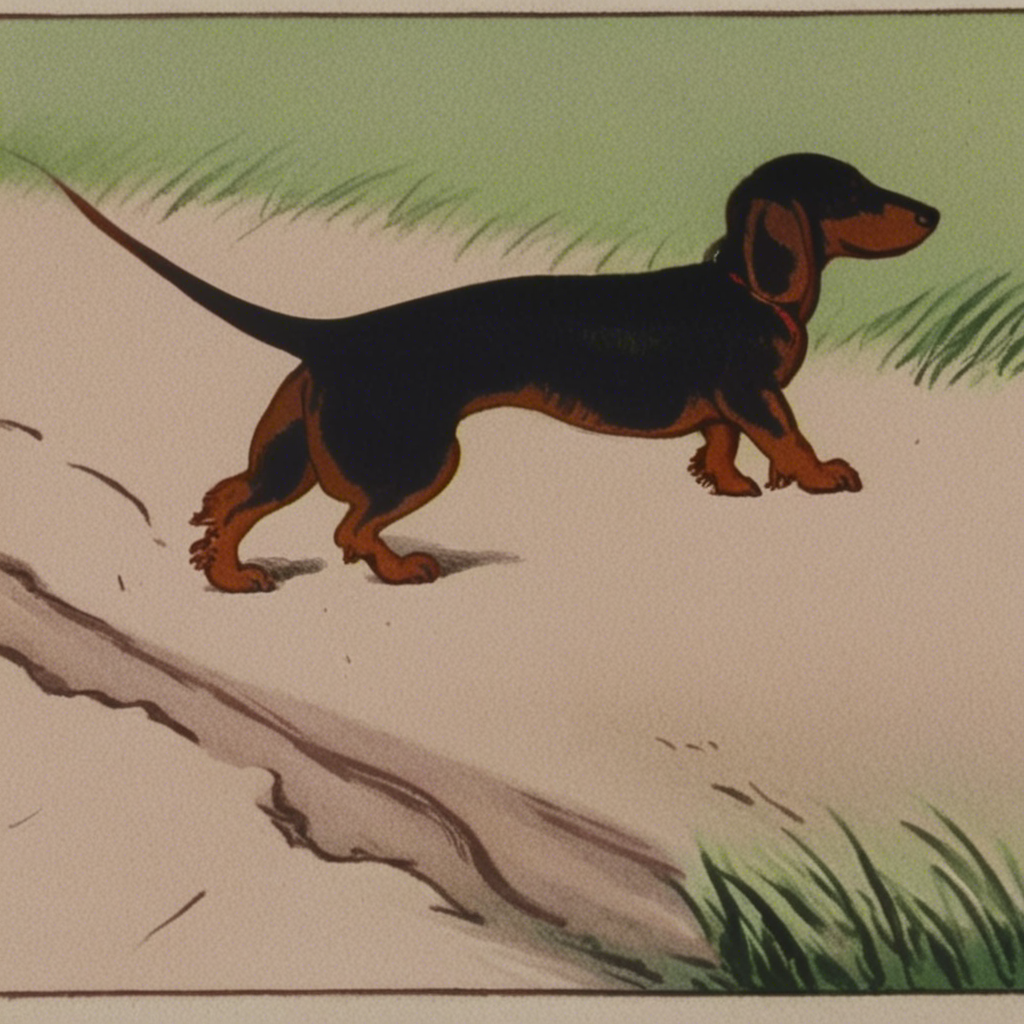

In [4]:
# Display image
image

In [ ]:
import streamlit as st
from PIL import Image
import io

def generate_image(prompt: str) -> Image.Image:
    # Invoke pipeline to generate image
    image = pipe(
        prompt = prompt,
        num_inference_steps=50,
        height=1024,
        width=1024,
        guidance_scale=7.0).images[0]
    #img = Image.new('RGB',(512,512),color='white')
    return image

st.set_page_config(pafe_title="Tect to Image Generation", layout="centered")

st.title("Tect to Image Generation")
st.markdown("Enter Prompt and generate and Image using Stable Diffusion XL Base 1.0")

prompt = st.text_imput("Enter your prompt here")

if st.button("Generate Image"):
    if prompt.strip() == "":
        st.warning("Please enter a prompt")
    else:
        with st.spinner("Generating Image"):
            image = generate_image(prompt)
            st.image(image)

In [ ]:
!run streamlit run MyApp.py